In [1]:
import pandas as pd
import numpy as np
import re
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
df = pd.read_csv("D:\\DS CLUB\\Restaurent Review\\Dataset\\data.csv")
print(df)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0    Review  1000 non-null   object
 1   Liked    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


C:\Users\FPTSHOP\AppData\Local\Temp\ipykernel_6500\3001876171.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x="Liked", data=df, palette="Set2")


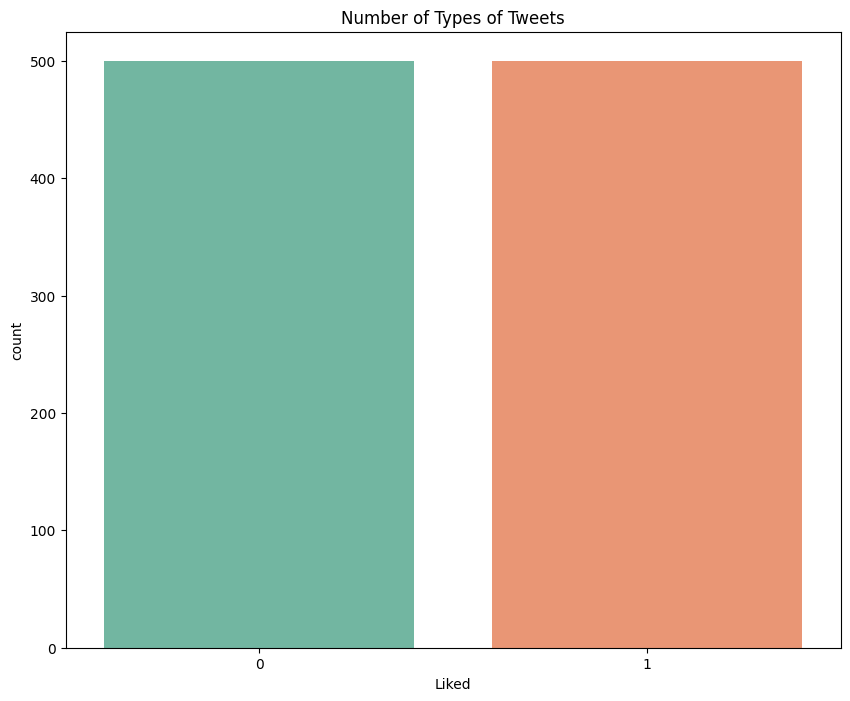

In [ ]:
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(10, 8))

# Tiêu đề biểu đồ
plt.title("Customer Feedback")

# Vẽ biểu đồ countplot với palette màu sắc
plot = sns.countplot(x="Liked", data=df, palette="Set2") 

# Thêm giá trị số lên trên các thanh trong biểu đồ
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', 
                  (p.get_x() + p.get_width() / 2, p.get_height() + 50), 
                  ha='center', va='center', 
                  fontsize=12, color='black')

# # Tạo figure và axis
# fig = plt.figure(figsize=(6, 6), dpi=100)
# ax = plt.subplot(111)

# # Tính số lượng của mỗi phân loại Sentiment
# sentiment_counts = df.groupby(["Liked"]).size()

# # Sử dụng seaborn để tạo palette màu pastel
# pastel_colors = sns.color_palette("Pastel1", n_colors=len(sentiment_counts))

# # Vẽ pie chart với màu pastel
# sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="", colors=pastel_colors)
# plt.title("Sentiment Distribution", fontsize=14)

# Hiển thị biểu đồ
plt.show()


In [5]:
df['Length'] = df[" Review"].apply(lambda x: len(str(x).split(' ')))
print("min length of sentence: " + str(df.Length.min()))
print("mean length of sentence: " + str(df.Length.mean()))
print("max length of sentence: " + str(df.Length.max()))
print("std dev length of sentence: " + str(df.Length.std()))

min length of sentence: 1
mean length of sentence: 10.894
max length of sentence: 32
std dev length of sentence: 6.257469130560687


In [6]:
min_length_review = df.loc[df[" Review"].str.len().idxmin(), " Review"]
print("Sentence with min length:", min_length_review)


Sentence with min length: DELICIOUS!!


In [7]:
stop_words = set(text.ENGLISH_STOP_WORDS) 
print(len(stop_words))
words_to_keep = {
    "not", "never", "no", "none", "nor", "can not", "could not", "has not", "do",
    "always", "sometimes", "often", "rarely", "usually", "can", "has", "down",
    "many", "few", "most", "several", "some", "all", "twenty", 
    "good", "bad", "amazing", "terrible", "horrible", "awesome", "awful",
    "happy", "sad", "love", "hate", "great", "disgusting", "delicious", "too", "enough", 
    "should", "much", "become", "back", "go", "can", "less", "least",
    "take", "would", "again", "nothing", "everything", "get", "might", "util", "next",
    "couldn't", "hasn't", "over", "up", "must", "have"
}

stop_words = list(stop_words - words_to_keep) 


print(len(stop_words))


318
278


In [8]:
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Chuyển về chữ thường
        text = re.sub(r'<.*?>', '', text)  # Loại bỏ HTML
        text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Loại bỏ URL
        text = re.sub(r'[^a-z\s]', '', text)  # Loại bỏ ký tự đặc biệt
        text = ' '.join([word for word in text.split() if word not in stop_words])
        return text
    return ""

# Áp dụng cho cột Review
df["Clean_review"] = df[" Review"].apply(clean_text)

label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["Liked"])

In [9]:
print(df["Clean_review"].isna().sum())
print((df["Clean_review"] == "").sum()) 


0
0


In [184]:
# empty_rows = df[df["Clean_review"] == ""][" Review"]
# print(empty_rows)


In [10]:
print(df)

                                                Review  Liked  Length  \
0                             Wow... Loved this place.      1       4   
1                                   Crust is not good.      0       4   
2            Not tasty and the texture was just nasty.      0       8   
3    Stopped by during the late May bank holiday of...      1      15   
4    The selection on the menu was great and so wer...      1      12   
..                                                 ...    ...     ...   
995  I think food should have flavor and texture an...      0      12   
996                           Appetite instantly gone.      0       3   
997  Overall I was not impressed and would not go b...      0      10   
998  The whole experience was underwhelming, and I ...      0      16   
999  Then, as if I hadn't wasted enough of my life ...      0      28   

                                          Clean_review  Label  
0                                      wow loved place     

In [11]:
df['l'] = df["Clean_review"].apply(lambda x: len(str(x).split(' ')))
print("min length of sentence: " + str(df.l.min()))
print("mean length of sentence: " + str(df.l.mean()))
print("max length of sentence: " + str(df.l.max()))
print("std dev length of sentence: " + str(df.l.std()))

min length of sentence: 1
mean length of sentence: 5.661
max length of sentence: 20
std dev length of sentence: 3.1496029906956524


In [12]:
# Kiểm tra kiểu dữ liệu của cột 'OriginalTweet'
df["Clean_review"] = df["Clean_review"].astype(str)  # Chuyển đổi thành kiểu chuỗi nếu cần thiết

print(df["Clean_review"].dtype)
print(df["Clean_review"].apply(type).value_counts())  # Kiểm tra các kiểu dữ liệu trong cột


object
Clean_review
<class 'str'>    1000
Name: count, dtype: int64


In [ ]:
# # Tạo CountVectorizer với stop_words là danh sách stop words
# count_vectorizer = CountVectorizer(stop_words=stop_words, max_features=1000)

# # Áp dụng CountVectorizer cho cột "Clean_review" /  Tokenization + Tạo từ điển (vocabulary) bằng fit()
# feature_vector = count_vectorizer.fit(df["Clean_review"])

# # Chuyển đổi văn bản thành ma trận đặc trưng
# train_ds_features = count_vectorizer.transform(df["Clean_review"])

# # Lấy các từ đã học được từ CountVectorizer
# features = feature_vector.get_feature_names_out()

# # Tính số lần xuất hiện của mỗi từ
# features_counts = np.sum(train_ds_features.toarray(), axis=0)

# # Đưa vào DataFrame để xem kết quả
# features_counts_df = pd.DataFrame({
#     'Features': features,
#     'Counts': features_counts
# })

# # Sắp xếp và lấy 15 từ xuất hiện nhiều nhất
# top_15_features = features_counts_df.sort_values("Counts", ascending=False).head(15)
# print(top_15_features)


    Features  Counts
246     food     124
422      not     116
507    place     106
267     good      95
674  service      83
270    great      70
291     have      62
32      back      61
355     like      46
6        all      43
263       go      43
825     time      42
601   really      36
335     just      35
54      best      30


In [13]:
# Khởi tạo TF-IDF với stop words
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=1000)

# Fit và transform dữ liệu
X_tfidf = tfidf_vectorizer.fit_transform(df["Clean_review"])

# Lưu TF-IDF để dùng trong model sau này
joblib.dump(tfidf_vectorizer, "D:\\DS CLUB\\Restaurent Review\\Dataset\\tfidf_vectorizer.pkl")

# Kiểm tra từ quan trọng nhất
features = tfidf_vectorizer.get_feature_names_out()
features_tfidf_scores = np.sum(X_tfidf.toarray(), axis=0)

# Đưa vào DataFrame để xem kết quả
features_tfidf_df = pd.DataFrame({
    'Features': features,
    'TF-IDF Scores': features_tfidf_scores
})

# Sắp xếp và lấy 15 từ quan trọng nhất
top_15_tfidf = features_tfidf_df.sort_values("TF-IDF Scores", ascending=False).head(15)
print(top_15_tfidf)

      Features  TF-IDF Scores
246       food      36.432633
267       good      32.893194
422        not      32.493242
507      place      31.623819
674    service      30.147749
270      great      25.251059
32        back      22.779987
291       have      17.330314
263         go      16.765049
355       like      14.894924
825       time      14.377603
6          all      14.360243
149  delicious      12.138983
601     really      12.070697
335       just      11.784745


In [ ]:
# # Lưu CountVectorizer để dùng sau này
# joblib.dump(count_vectorizer, "D:\\DS CLUB\\Restaurent Review\\Dataset\\vectorizer.pkl")


['D:\\DS CLUB\\Restaurent Review\\Dataset\\vectorizer.pkl']

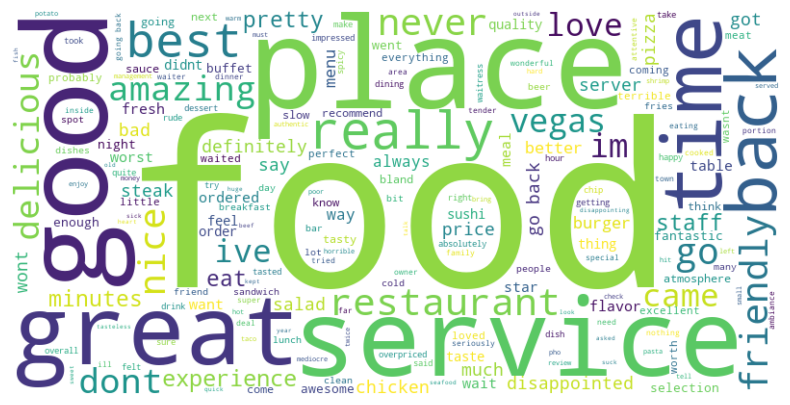

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["Clean_review"]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [15]:
df = df.drop([" Review", "Liked", "Length", "l"], axis=1)
print(df)

                                          Clean_review  Label
0                                      wow loved place      1
1                                       crust not good      0
2                         not tasty texture just nasty      0
3    stopped late bank holiday rick steve recommend...      1
4                          selection menu great prices      1
..                                                 ...    ...
995      think food should have flavor texture lacking      0
996                            appetite instantly gone      0
997            overall not impressed would not go back      0
998  experience underwhelming think just go ninja s...      0
999  hadnt wasted enough life poured salt wound dra...      0

[1000 rows x 2 columns]


In [16]:

df.to_csv("D:\\DS CLUB\\Restaurent Review\\Dataset\\training_data.csv", index = False)